# Kyphosis Outcome Prediction Using Supervised Learning: A Comparative Machine Learning Approach

In [12]:
# Kyphosis Risk Prediction with Machine Learning
# Author: Leila Gholizadeh Zivlaei
# Description: This project builds and evaluates ML models to predict kyphosis (spinal curvature) after surgery.
# Models: Logistic Regression, Random Forest
# Techniques: Pipeline, StandardScaler, Cross-Validation, Confusion Matrix, ROC Curve

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, RocCurveDisplay

In [14]:
# Step 1 – Load dataset
data = pd.read_csv('/Users/leilagholizadehzivlaei/Desktop/Machine Learning/kyphosis.csv')
data['Kyphosis'] = data['Kyphosis'].astype('category')
data['Kyphosis_binary'] = pd.get_dummies(data['Kyphosis'], drop_first=True).astype(int)


In [16]:
# Step 2 – Define features and target
X = data[['Age', 'Number', 'Start']]
y = data['Kyphosis_binary']

In [18]:
# Step 3 – Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
# Step 4 – Define models
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(class_weight='balanced', random_state=42)
}

results = {}

In [22]:
# Step 5 – Train, cross-validate, and evaluate each model
for name, model in models.items():
    pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', model)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5)
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)

    results[name] = {
        'mean_accuracy': scores.mean(),
        'std': scores.std(),
        'model': pipe,
        'conf_matrix': confusion_matrix(y_test, y_pred),
        'report': classification_report(y_test, y_pred, output_dict=True)
    }

In [24]:
# Step 6 – Plot ROC curve for the best model
best_model_name = max(results, key=lambda x: results[x]['mean_accuracy'])
best_model = results[best_model_name]['model']
y_prob = best_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

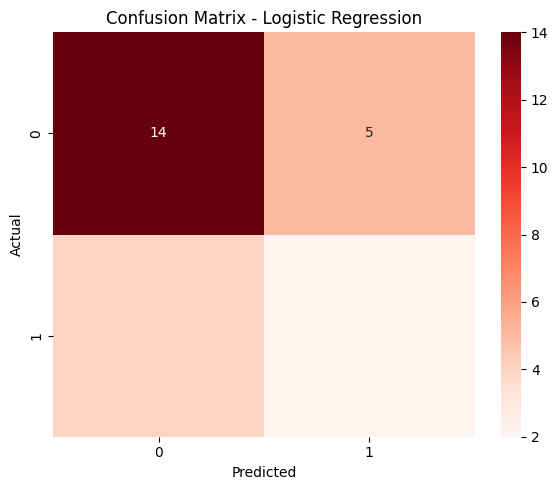

In [36]:
# Step 7 – Visualization

# Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(results[best_model_name]['conf_matrix'], annot=True, fmt='d', cmap='Reds')
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.savefig('confusion_matrix.png')
plt.show()

<Figure size 640x480 with 0 Axes>

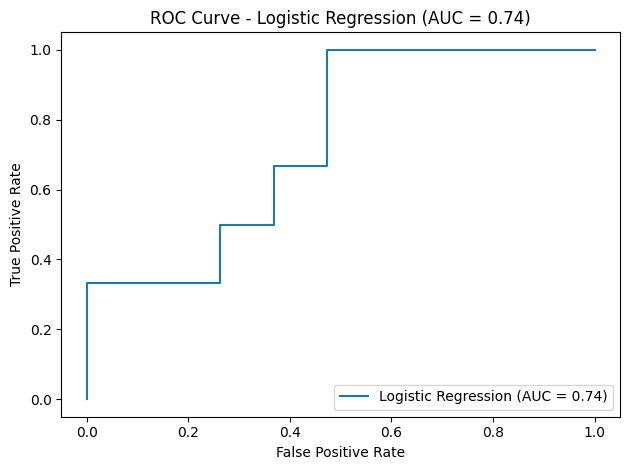

In [38]:
# ROC Curve
plt.figure()
RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name=best_model_name).plot()
plt.title(f'ROC Curve - {best_model_name} (AUC = {roc_auc:.2f})')
plt.tight_layout()
plt.savefig('roc_curve.png')
plt.show()

In [40]:
# Step 8 – Summary Table
summary_df = pd.DataFrame({
    name: {
        'Mean CV Accuracy': round(res['mean_accuracy'], 2),
        'Standard Deviation': round(res['std'], 2)
    } for name, res in results.items()
}).T

summary_df.to_csv('model_comparison_summary.csv')
print("Model comparison summary:")
print(summary_df)

# Save classification report of best model
best_report_df = pd.DataFrame(results[best_model_name]['report']).transpose()
best_report_df.to_csv(f'{best_model_name.lower().replace(" ", "_")}_classification_report.csv')

print(f"\n✅ Best model: {best_model_name}")
print(f"ROC AUC Score: {roc_auc:.2f}")

Model comparison summary:
                     Mean CV Accuracy  Standard Deviation
Logistic Regression              0.82                0.05
Random Forest                    0.82                0.08

✅ Best model: Logistic Regression
ROC AUC Score: 0.74
